# Introduction to Pandas


## Package Imports


In [78]:
import random
import pandas as pd
import matplotlib as plt


## Creating Pandas Series and Dataframes


In [79]:
series_manufacturers = pd.Series(["BMW", "Mercedes", "Audi"])
series_colors = pd.Series(["Black", "White", "Red"])

dataframe = pd.DataFrame(
    {"Manufacturer": series_manufacturers, "Color": series_colors})


## Reading CSV Data


In [80]:
car_sales = pd.read_csv("./data/car-sales.csv")


## Exporting CSV Data


In [81]:
car_sales.to_csv("./data/car-sales-export.csv", index=False)


## Describing Data


In [82]:
car_sales.dtypes

car_sales.columns

car_sales.describe()
car_sales.info()

len(car_sales)

car_sales["Doors"].mean()
car_sales["Doors"].median()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10 non-null     object 
 1   Colour         10 non-null     object 
 2   Odometer (KM)  10 non-null     int64  
 3   Doors          9 non-null      float64
 4   Price          9 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


4.0

## Selecting Rows


In [83]:
# First X rows
car_sales.head(5)

# Last X rows
car_sales.tail(5)

# Rows with index X
car_sales.loc[3]

# Row at position X
car_sales.iloc[4]


Make                Nissan
Colour               White
Odometer (KM)       213095
Doors                  4.0
Price            $3,500.00
Name: 4, dtype: object

## Selecting Columns


In [84]:
car_sales["Make"]
car_sales["Colour"]


0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

## Filtering Rows


In [85]:
japanese_makes = {"Toyota"}
car_sales[car_sales["Make"].isin(japanese_makes)]


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4.0,"$4,000.00"
2,Toyota,Blue,32549,NaN,"$7,000.00"
5,Toyota,Green,99213,4.0,"$4,500.00"
8,Toyota,White,60000,4.0,"$6,250.00"


## Generating Crosstabs


In [86]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])


Doors,4.0,5.0
Make,,
BMW,0,1
Honda,3,0
Nissan,2,0
Toyota,3,0


## Grouping Data


In [87]:
car_sales.groupby(["Colour", "Make"]).describe()


Odometer (KM)                                               
                      count      mean            std      min       25%   
Colour Make                                                               
Black  BMW              1.0   11179.0            NaN  11179.0  11179.00  \
Blue   Honda            2.0   50218.0    6392.245302  45698.0  47958.00   
       Toyota           1.0   32549.0            NaN  32549.0  32549.00   
Green  Toyota           1.0   99213.0            NaN  99213.0  99213.00   
Red    Honda            1.0   87899.0            NaN  87899.0  87899.00   
White  Nissan           2.0  122347.5  128336.345251  31600.0  76973.75   
       Toyota           2.0  105021.5   63670.015898  60000.0  82510.75   

                                             Doors                            
                    50%        75%       max count mean  std  min  25%  50%   
Colour Make                                                                   
Black  BMW      11179.0   11179.00   11179.0   1.0  5.0  NaN  5.0  5.0  5.0  \
Blue   Honda    50218.0   52478.00   54738.0   2.0  4.0  0.0  4.0  4.0  4.0   
       Toyota   32549.0   32549.00   32549.0   0.0  NaN  NaN  NaN  NaN  NaN   
Green  Toyota   99213.0   99213.00   99213.0   1.0  4.0  NaN  4.0  4.0  4.0   
Red    Honda    87899.0   87899.00   87899.0   1.0  4.0  NaN  4.0  4.0  4.0   
White  Nissan  122347.5  167721.25  213095.0   2.0  4.0  0.0  4.0  4.0  4.0   
       Toyota  105021.5  127532.25  150043.0   2.0  4.0  0.0  4.0  4.0  4.0   

                         
               75%  max  
Colour Make              
Black  BMW     5.0  5.0  
Blue   Honda   4.0  4.0  
       Toyota  NaN  NaN  
Green  Toyota  4.0  4.0  
Red    Honda   4.0  4.0  
White  Nissan  4.0  4.0  
       Toyota  4.0  4.0

## Visualizing Data


<Axes: >

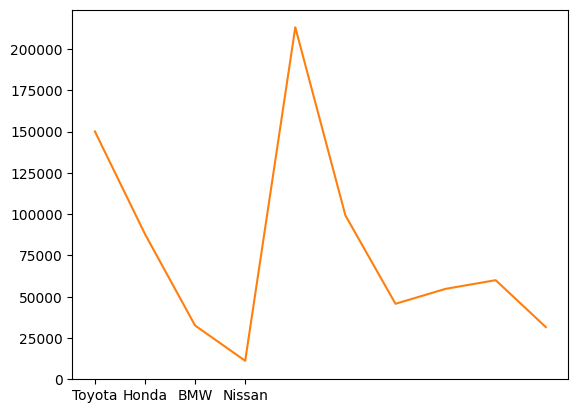

In [88]:
# Histogram
car_sales["Make"].hist()

# Line chart
car_sales["Odometer (KM)"].plot()


## Transforming Data


In [99]:
car_sales["Odometer (Miles)"] = car_sales["Odometer (KM)"].apply(lambda x: round(x / 1.6))

car_sales = car_sales.dropna()

car_sales["Price"] = (
    car_sales["Price"]
    .astype(str)
    .replace("[$,]", "", regex=True)
    .astype(float)
    .astype(int)
)

car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels,Road Safety Test,Fuel per 100km,Total Fuel Consumption,Odometer (Miles)
0,Toyota,White,150043,4.0,4000,5,4,True,8.3,12454.0,93777
1,Honda,Red,87899,4.0,5000,5,4,True,3.0,2637.0,54937
3,BMW,Black,11179,5.0,22000,5,4,True,5.1,570.0,6987
4,Nissan,White,213095,4.0,3500,5,4,False,8.9,18965.0,133184
5,Toyota,Green,99213,4.0,4500,5,4,True,3.1,3076.0,62008
7,Honda,Blue,54738,4.0,7000,5,4,True,4.8,2627.0,34211
8,Toyota,White,60000,4.0,6250,5,4,False,8.7,5220.0,37500
9,Nissan,White,31600,4.0,9700,5,4,False,3.0,948.0,19750


## Adding Data


In [90]:
car_sales["Seats"] = pd.Series()
car_sales["Seats"].fillna(5, inplace=True)

car_sales["Wheels"] = 4

car_sales["Road Safety Test"] = [
    random.randrange(0, 5) > 0 for i in range(len(car_sales))
]

fuel_per_100km_column = [random.randrange(
    30, 100) / 10 for i in range(len(car_sales))]
car_sales["Fuel per 100km"] = fuel_per_100km_column

car_sales["Total Fuel Consumption"] = round(
    car_sales["Odometer (KM)"] * car_sales["Fuel per 100km"] / 100
)

car_sales


,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels,Road Safety Test,Fuel per 100km,Total Fuel Consumption
0,Toyota,White,150043,4.0,4000,5,4,True,8.3,12454.0
1,Honda,Red,87899,4.0,5000,5,4,True,3.0,2637.0
3,BMW,Black,11179,5.0,22000,5,4,True,5.1,570.0
4,Nissan,White,213095,4.0,3500,5,4,False,8.9,18965.0
5,Toyota,Green,99213,4.0,4500,5,4,True,3.1,3076.0
7,Honda,Blue,54738,4.0,7000,5,4,True,4.8,2627.0
8,Toyota,White,60000,4.0,6250,5,4,False,8.7,5220.0
9,Nissan,White,31600,4.0,9700,5,4,False,3.0,948.0


## Shuffling & Sampling Data

In [95]:
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled.reset_index(drop=True, inplace=True)

car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Wheels,Road Safety Test,Fuel per 100km,Total Fuel Consumption
0,Toyota,White,150043,4.0,4000,5,4,True,8.3,12454.0
1,Honda,Blue,54738,4.0,7000,5,4,True,4.8,2627.0
2,Toyota,Green,99213,4.0,4500,5,4,True,3.1,3076.0
3,Nissan,White,213095,4.0,3500,5,4,False,8.9,18965.0
4,Honda,Red,87899,4.0,5000,5,4,True,3.0,2637.0
5,Toyota,White,60000,4.0,6250,5,4,False,8.7,5220.0
6,BMW,Black,11179,5.0,22000,5,4,True,5.1,570.0
7,Nissan,White,31600,4.0,9700,5,4,False,3.0,948.0
